Run an analysis on my own data. I need to be able to access the data.


In [4]:
# read data

from pytetrad_plus import MyTetradSearch
import pprint

ts = MyTetradSearch()

# read data
df = ts.read_csv(f'HINF5660 2025 extra credit data.csv')

df

,V3,V2,V1,Y,V6,X,Z,V8,A,B
0,8.664572,3.814074,-1.940943,2.021112,-0.312353,2.102669,1.855167,0.544582,7.145446,7.227991
1,9.775891,2.403630,1.272587,0.425088,0.969035,4.529575,3.560956,1.759685,6.037929,5.774928
2,9.164975,3.388250,1.422488,1.935278,0.219630,0.684954,0.435031,0.859976,6.277137,7.494771
3,9.201432,3.843721,-0.742163,2.076599,1.211959,2.212968,1.510550,1.706644,7.652403,6.189962
4,11.570124,4.566536,1.773819,0.923744,0.281393,0.904513,2.324837,-0.425178,3.680821,5.886430
...,...,...,...,...,...,...,...,...,...,...
995,9.711738,2.691686,0.841387,-0.811759,-0.032159,1.782397,1.218257,-1.371884,8.761448,6.648111
996,11.613526,5.181700,1.908678,-1.119759,0.592012,1.710866,3.608142,0.899682,6.680745,7.031204
997,11.286783,3.897429,1.044914,1.713174,-0.189947,1.415068,0.724415,2.370094,4.026501,7.953272
998,10.320962,3.698207,1.757196,2.274301,-0.381216,2.113038,1.151963,1.212954,8.046421,7.789878


In [5]:

# run the  gfci model search
searchResult = ts.run_model_search( df, 
                                    model='gfci',
                                    #knowledge=knowledge,
                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                    test={'fisher_z': {'alpha': .05}})

edges = list(searchResult['setEdges'])
pprint.pprint(edges)

['V3 o-> V1',
 'V6 --> V8',
 'V2 o-> V1',
 'V1 --> V6',
 'Z o-o X',
 'Z o-o V3',
 'A o-> V8']


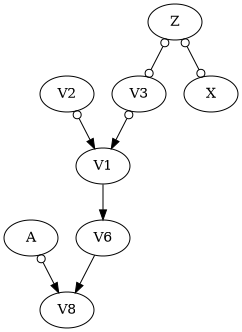

In [6]:
# create graph with the edges

from dgraph_flex import DgraphFlex
# create graph output
obj = DgraphFlex()

# add edges to graph object
obj.add_edges(edges)

# show graph
obj.show_graph()

In [7]:
# run the sem
import semopy

lavaan_model = ts.edges_to_lavaan(edges)
    
# run semopy
sem_results = ts.run_semopy(lavaan_model, df)
    
# plot into png
png_path = 'extra_credit.png'

# create the semopy package graph
g = semopy.semplot(sem_results['model'], png_path,  plot_covs = True)

pass

In [8]:
# see results
sem_results['estimates']

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,V1,~,V3,0.380164,0.027289,13.930982,0.000000e+00
1,V1,~,V2,-0.498051,0.030556,-16.299544,0.000000e+00
2,V6,~,V1,0.188158,0.025212,7.463027,8.459899e-14
3,V8,~,V6,1.005612,0.042381,23.727658,0.000000e+00
4,V8,~,A,0.372956,0.025717,14.502460,0.000000e+00
5,V1,~~,V1,0.990341,0.044289,22.360680,0.000000e+00
6,V6,~~,V6,0.907551,0.040587,22.360680,0.000000e+00
7,V8,~~,V8,1.720916,0.076962,22.360680,0.000000e+00


In [ ]:
# add sem results to existing graph

ts.add_sem_results_to_graph(obj, sem_results['estimates'])
obj.show_graph()